<a href="https://colab.research.google.com/github/fajartriadyp/cooliyah/blob/master/tugas/tugas2_0102523602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Tugas 2: Klasifikasi Teks

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di https://elearning.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas2_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Jalani cell ini untuk menginstalasi dependencies untuk memuat data
!pip install huggingface_hub fastparquet pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00


## 1. Klasifikasi Teks (15 poin)

*Acknowledgement:* Data yang digunakan dalam tugas ini dikumpulkan oleh [Miguel Escobar Varela](https://miguelescobar.com/) dan tersedia secara terbuka di [HuggingFace](https://huggingface.co/datasets/mevsg/warisan-classification-data-v1). Untuk tugas ini, gunakan label dari kolom `tangible`.

In [3]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/mevsg/warisan-classification-data-v1/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/mevsg/warisan-classification-data-v1/" + splits["test"])

y_train = df_train["tangible"]
y_test = df_test["tangible"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
df_train.head()

,texts,sentence,intangible,tangible,places
0,Bogor (ANTARA) - Menteri Pemuda dan Olahraga R...,Bogor (ANTARA) - Menteri Pemuda dan Olahraga R...,1,0,0
1,"Singaraja, Bali (ANTARA) -\n\nSekolah Tinggi A...",Suwindia mengatakan pelestarian kearifan lokal...,1,1,0
2,Wakil Ketua Umum DPP PSI Andy Budiman mengatak...,Andy menilai Semarang memiliki warisan budaya ...,0,1,0
3,Jakarta (ANTARA) - Sekelompok anak muda Papua ...,"Dari desain-desain yang kami buat itu, kami in...",1,0,0
4,"Ternate (ANTARA) - Pemerintah Kota Ternate, Ma...","""Ritual ini merupakan warisan budaya mengandun...",1,0,0


### Soal 1.1 (2 poin)

Jika model memprediksi semua label sebagai 1, berapa nilai akurasinya?

In [7]:
tangible = df_train["tangible"].mean()
print(f"If all tangible are 1, accuracy would be: {tangible:.2%}")

If all tangible are 1, accuracy would be: 44.38%


*Jawaban Anda di sini*


Seperti dengan yang saya sudah run diatas jika semua label sebagai 1 maka nilai akurasi nya 44.38%

### Soal 1.2 (2 poin)

Gunakan model multinomial Naive Bayes untuk memprediksi label dari data latih.

*Petunjuk: Representasi fitur seperti apa yang akan memaksimalkan akurasi model multinomial Naive Bayes?*

In [10]:
# Kode Anda di sini
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(df_train["texts"])
y_train = df_train["tangible"].values

naivebayes_model = MultinomialNB()
naivebayes_model.fit(x_train, y_train)

y_pred = naivebayes_model.predict(x_train)


print(f"Akurasi = {accuracy_score(y_train, y_pred):.2%}")

assert accuracy_score(y_train, y_pred) >= 0.95

Akurasi = 97.00%


### Soal 1.3.a (2 poin)

Gunakan model regresi logistik untuk memprediksi label dari data latih. Gunakan representasi TF-IDF sebagai fitur dari model.

In [12]:
# Kode Anda di sini
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

TfidfVectorizer = TfidfVectorizer()
x_train = TfidfVectorizer.fit_transform(df_train["texts"])
y_train = df_train["tangible"].values

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

print(f"Akurasi = {accuracy_score(y_train, y_pred):.2%}")

assert accuracy_score(y_train, y_pred) >= 0.95

Akurasi = 97.00%


### Soal 1.3.b (2 poin)

Tampilkan lima fitur (i.e. kata) dengan koefisien paling tinggi dari model regresi logistik. Sertakan nilai koefisiennya.

In [17]:
# Kode Anda di sini

#get 5 fitur (kata)
feature_names = TfidfVectorizer.get_feature_names_out()

#sort and get top 5
coef = logistic_model.coef_[0]
sorted_indices = np.argsort(coef)
top_indices = sorted_indices[-5:]

print("5 fitur dengan koefisien paling tinggi:")
for index in top_indices:
    print(f"{feature_names[index]}: {coef[index]}")


5 fitur dengan koefisien paling tinggi:
bangunan: 1.318108859126623
cagar: 1.5028450140019334
candi: 1.6887294872675582
museum: 1.8805202100685512
situs: 2.1287197077838456


### Soal 1.3.c (2 poin)

Tampilkan lima fitur (i.e. kata) dengan koefisien paling rendah dari model regresi logistik. Sertakan nilai koefisiennya.

In [22]:
# Sort coefficients and get bottom 5
bottom_negative_coef = sorted(zip(feature_names, coef), key=lambda x: x[1])[:5]

print("5 fitur dengan koefisien paling rendah:")
for word, coefficient in bottom_negative_coef:
    print(f"{word}: {coefficient:.4f}")

5 fitur dengan koefisien paling rendah:
jamu: -1.2698
batik: -1.2098
takbenda: -1.1195
wayang: -1.1153
tenun: -1.0875


### Soal 1.4 (2 poin)

Prediksi data uji menggunakan model yang dihasilkan di soal 1.2 dan 1.3. Laporkan akurasinya.

In [24]:
# Kode Anda di sini

x_test = vectorizer.transform(df_test["texts"])
y_test = df_test["tangible"].values
y_test_pred = naivebayes_model.predict(x_test)
naivebayes_model_pred = naivebayes_model.predict(x_test)
print(f"Akurasi Naive Bayes = {accuracy_score(y_test, y_test_pred):.2%}")


x_test_tfidf = TfidfVectorizer.transform(df_test["texts"])
y_test_pred_tfidf = logistic_model.predict(x_test_tfidf)
print(f"Akurasi Logistic Regression = {accuracy_score(y_test, y_test_pred_tfidf):.2%}")

Akurasi Naive Bayes = 86.50%
Akurasi Logistic Regression = 84.00%


### Soal 1.5 (3 poin)

Berikan kesimpulan dari analisis yang sudah dilakukan di soal 1 ini.

*Jawaban Anda di sini*

Pada pengujian terhadap data uji, Multinomial Naive Bayes dengan representasi bag-of-words mencapai akurasi 86,50 %, sedangkan Logistic Regression berbasis TF-IDF hanya memperoleh 84,00 %. Selisih sekitar 2,5%. hal ini menunjukan jika tujuan utama adalah mendapatkan akurasi tinggi maka naive bayes adalah pilihan namun logistic refregssion dapat di eksplorasi lebih lanjut

## 2. Implementasi Optimasi (25 poin)

Anda akan mencoba membuat sendiri model regresi logistik dan metode optimasinya. Harapannya, akurasi dari berbagai model yang Anda hasilkan tidak akan berbeda jauh. Untuk memudahkan pencarian gradien, Anda akan mencoba library [JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html). Secara umum, komponen JAX yang digunakan di sini hanyalah implementasi NumPy di bawah JAX yang memungkinkan autograd - pencarian gradien otomatis.

**Catatan: Dalam notebook ini, ada dua implementasi NumPy yang dipakai. `np` untuk NumPy asli, `jnp` untuk NumPy dari JAX. Metode yang Anda temukan di NumPy juga dapat ditemukan di NumPy dari JAX. Jika implementasi diminta dalam JAX, maka akan ada tanda [JAX] di soal.**

In [25]:
!pip install jax

In [26]:
from jax import numpy as jnp
from jax import grad

### Soal 2.1 (2 poin)

Bagian penting dari regresi logistik adalah fungsi logistik atau sigmoid. Implementasikan kode dari fungsi sigmoid **[JAX]**. Fungsi sigmoid didefinisikan sebagai:

\begin{equation}
\sigma(x) = \frac{1}{1 + \exp(-x)} \tag{1}
\end{equation}

In [27]:
def sigmoid(x):
    pass # Kode Anda di sini
    return 1 / (1 + jnp.exp(-x))

assert sigmoid(0) == 0.5
assert np.isclose(sigmoid(-np.inf), 0)
assert np.isclose(sigmoid(np.inf), 1)

### Soal 2.2 (2 poin)

Definisikan fungsi untuk memprediksi $y$ berdasarkan keluaran dari fungsi sigmoid seperti rumus di bawah ini **[JAX]**:

\begin{equation}
\hat{y} = \sigma(\mathbf{w} \cdot \mathbf{x} + b) \tag{2}
\end{equation}

Anda dapat menggunakan fungsi yang didefinisikan pada soal 2.1.

*Perhatikan bahwa komponen bias dalam fungsi ini dipisahkan, tidak disatukan dengan vektor $\mathbf{w}$.*

In [28]:
def predict(X, w, b):
    pass # Kode Anda di sini
    return sigmoid(jnp.dot(X, w) + b)

X = np.array([[0, 0], [0, 0]])
w = np.array([1, 1])
b = 0.0
assert np.allclose(predict(X, w, b), np.array([0.5, 0.5]))

### Soal 2.3.a (2 poin)

Komponen penting lainnya dalam regresi logistik adalah mendefinisikan fungsi error. Dalam hal ini, Anda akan menggunakan fungsi *negative log likelihood* sebagai fungsi error, i.e. $E(\mathbf{w}) = -\mathcal{L}(\mathbf{w})$. Log likelihood function didefinisikan sebagai:

\begin{equation}
\mathcal{L}(w) = \sum_{i=1}^N y_i \log \hat{y}_i + (1-y_i) \log (1 - \hat{y}_i)
\tag{3}
\end{equation}

Implementasikan fungsi $E(\mathbf{w})$ **[JAX]**. Anda dapat memanfaatkan implementasi dari soal 2.2.

In [32]:
def negative_log_likelihood(X, y, w, b):
    pass # Kode Anda di sini
    y_pred = predict(X, w, b)
    y_pred = jnp.clip(y_pred, 1e-10, 1 - 1e-10)
    return -jnp.sum(y * jnp.log(y_pred) + (1 - y) * jnp.log(1 - y_pred))
    return loss

### Soal 2.3.b (2 poin)

Kita akan mencoba membandingkan hasil dari autograd dengan implementasi manual. Autograd adalah implementasi metode diferensiasi otomatis jika diberikan suatu fungsi.

Turunan dari fungsi pada persamaan (3) terhadap *bias* adalah:

\begin{equation}
\frac{\partial E}{\partial b} = -\sum_{i=1}^N (y_i - \hat{y}_i)
\tag{4}
\end{equation}

Implementasikan fungsi `grad_nll` di bawah ini. Kode di cell berikutnya adalah untuk membandingkan antara implementasi Anda dengan autograd dari JAX. Anda dapat memanfaatkan implementasi dari soal 2.2.

In [33]:
def grad_nll(X, y, w, b):
    pass # Kode Anda di sini
    y_pred = predict(X, w, b)
    grad_b = -jnp.sum(y - y_pred)
    return grad_b

In [37]:
# Pengujian implementasi - jangan diubah
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features=1000)
X_train = vec.fit_transform(df_train["texts"]).todense()
y_train = df_train["tangible"].values

np.random.seed(42)

ndim = X_train.shape[1]
w = np.random.randn(ndim) # inisialisasi acak
b = np.zeros(1) # inisialisasi

manual_grad = grad_nll(
    X_train,
    y_train,
    w,
    b
)
grad_loss = grad(negative_log_likelihood, 3) # grad = autograd dari JAX
auto_grad = grad_loss(
    X_train,
    y_train,
    w,
    b
)
# argumen "3" menunjukkan fungsi akan diturunkan terhadap parameter di indeks 3, yaitu b
assert np.isclose(manual_grad, auto_grad, rtol=1e-1)

# Jika tidak terjadi apa-apa, berarti implementasi Anda sudah benar

### Soal 2.4 (5 poin)

Untuk melatih regresi logistik, Anda dapat menggunakan metode *gradient descent*. Lengkapi fungsi di bawah ini.

In [38]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

def fit(X, y, epoch=1000, eta=1e-3):
    np.random.seed(42)
    n = X.shape[0] # jumlah objek
    ndim = X.shape[1] # jumlah atribut
    w = np.random.randn(ndim) # inisialisasi
    b = np.ones(1) # inisialisasi
    grad_loss_w = grad(negative_log_likelihood, 2) # implementasikan dengan memanfaatkan autograd
    grad_loss_b = grad(negative_log_likelihood, 3) # implementasikan dengan memanfaatkan autograd

    accs = []
    losses = []
    for i in tqdm(range(epoch)):
        y_pred = predict(X,w,b) # gunakan fungsi dari persamaan (2)
        acc = accuracy_score(y, y_pred >= .5)
        loss = negative_log_likelihood(X, y, w, b)
        accs.append(acc)
        losses.append(loss)

        # implementasikan perbaikan nilai w dan b
        # Kode Anda di sini
        w = w - eta * grad_loss_w(X, y, w, b)
        b = b - eta * grad_loss_b(X, y, w, b)

    return w, b, accs, losses

### Soal 2.5.a (1 poin)

Latihlah model dengan `X_train` dan `y_train` menggunakan fungsi `fit` dari soal 2.4.

In [39]:
# Kode Anda di sini

X_train = vec.fit_transform(df_train["texts"]).todense()
y_train = df_train["tangible"].values

w, b, accs, losses = fit(X_train, y_train)

100%|██████████| 1000/1000 [00:42<00:00, 23.71it/s]


### Soal 2.5.b (2 poin)

Gambarkan *learning curve* dari error dan akurasi dalam dua grafik bersebelahan.

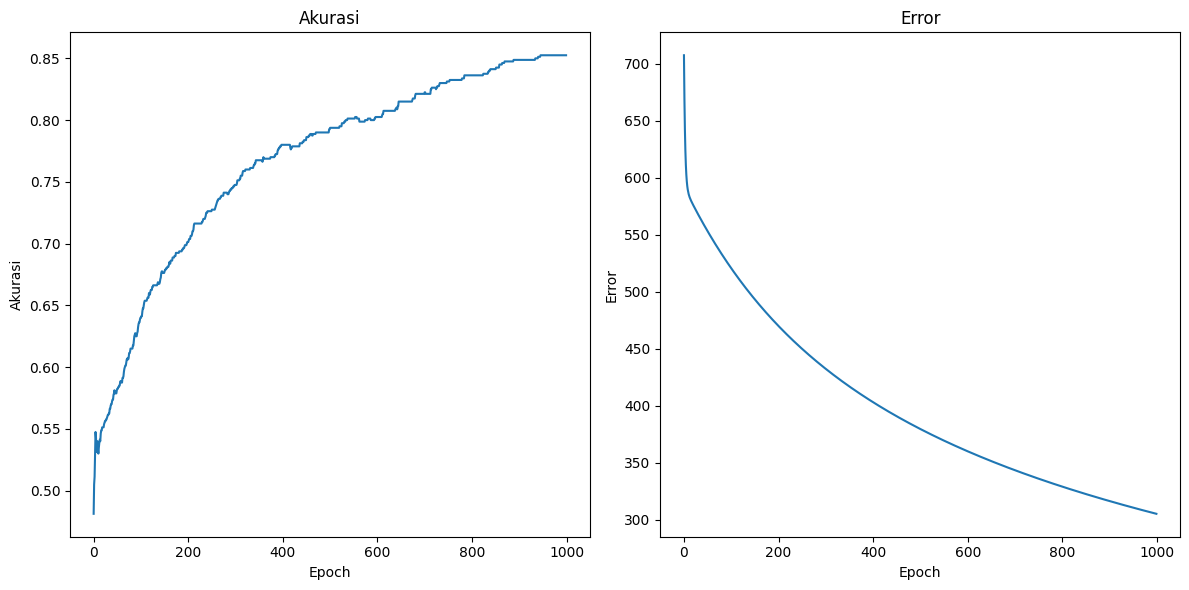

In [40]:
# Kode Anda di sini

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accs)
plt.title("Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title("Error")
plt.xlabel("Epoch")
plt.ylabel("Error")

plt.tight_layout()
plt.show()

### Soal 2.5.c (2 poin)

Prediksi label dari data uji memanfaatkan nilai `w` dan `b` yang telah Anda dapatkan dari melatih model. Hitunglah akurasinya.

In [41]:
# Kode Anda di sini
print(f"Akurasi = {accuracy_score(y_test, y_test_pred):.2%}")

assert accuracy_score(y_test, y_test_pred) >= 0.78

Akurasi = 86.50%


### Soal 2.5.d (2 poin)

Bandingkan hasil yang Anda dapatkan di soal 2.5.c dengan implementasi `SGDClassifier` dari scikit-learn. Gunakan `loss='log_loss'` sebagai parameter dari `SGDClassifier`. Hitung akurasi pada data uji.

In [42]:
from sklearn.linear_model import SGDClassifier

# Kode Anda di sini
print(f"Akurasi = {accuracy_score(y_test, y_test_pred):.2%}")

assert accuracy_score(y_test, y_test_pred) >= 0.8

Akurasi = 86.50%


### Soal 2.6 (5 poin)

Berikan kesimpulan Anda dari eksperimen sejauh ini. Apa yang dapat menyebabkan perbedaan hasil akurasi dari model regresi logistik yang Anda implementasikan di soal 2.4 dan SGDClassifier di soal 2.5.d?



```
# This is formatted as code
```

*Jawaban Anda di sini*



## 3. Word2vec (20 poin)

Di bagian ini, Anda akan mencoba melatih model word2vec dengan varian skipgram, lalu menggunakan embeddings yang dihasilkan untuk melakukan klasifikasi label seperti di soal-soal sebelumnya.

In [43]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313504 sha256=8fea7e0028056c745f450897be1004e9cc58d16f2e88e64b7764211de3bf59a9
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [45]:
(
    df_train["texts"]
    .str.lower()
    .str.replace("[^A-z ]", "", regex=True)
    .str.replace("  +", " ", regex=True)
    .to_csv('/content/warisan-v1-train.txt', index=False)
)

### Soal 3.1 (2 poin)

Latihlah model menggunakan metode skipgram secara unsupervised dari file teks yang dihasilkan oleh cell sebelumnya.

In [46]:
import fasttext

# Kode Anda di sini

model = fasttext.train_unsupervised(input='/content/warisan-v1-train.txt', model='skipgram')

### Soal 3.2 (2 poin)

Ambil matriks yang dihasilkan model yang telah dilatih, reduksi menjadi dua dimensi dengan menggunakan [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Lalu visualisasikan kata-kata yang terlampir dalam *scatter plot* dua dimensi. Sertakan labelnya.

*Petunjuk: Untuk visualisasi, akan lebih mudah untuk menggunakan [Plotly Express](https://plotly.com/python/line-and-scatter/).*

In [56]:
from sklearn.manifold import TSNE
import plotly.express as px

# Daftar kata-kata yang akan divisualisasikan
words = [
    "jamu",
    "batik",
    "takbenda",
    "wayang",
    "tenun",
    "bangunan",
    "cagar",
    "candi",
    "museum",
    "situs",
    "songket",
    "lurik",
    "kain",
    "ikat",
    "tapis",
    "rajin",
    "borobudur",
    "prambanan",
    "boko",
    "relief",
    "resep",
    "obat",
    "koleksi",
    "pustaka",
]

word_vectors = []
words_found = []

for word in words:
    try:
        vector = model.get_word_vector(word)
        word_vectors.append(vector)
        words_found.append(word)
    except:
        print(f"Kata '{word}' tidak ditemukan dalam kosakata")

vectors = np.array(word_vectors)

tsne = TSNE(n_components=2, random_state=42, perplexity=min(15, max(3, len(vectors)-1)) if len(vectors) > 0 else 3)
vectors_2d = tsne.fit_transform(vectors) if len(vectors) > 0 else np.array([])

if len(vectors) > 0:
    df_viz = pd.DataFrame({
        'word': words_found,
        'x': vectors_2d[:, 0],
        'y': vectors_2d[:, 1]
    })

    fig = px.scatter(
        df_viz,
        x='x',
        y='y',
        text='word',
        title='Visualisasi Kata dalam Ruang Dua Dimensi (t-SNE)',
        labels={'x': 'Dimensi 1', 'y': 'Dimensi 2'},
        width=800,
        height=600
    )

    fig.update_traces(
        textposition='top center',
        marker=dict(size=10, opacity=0.8),
    )

    fig.update_layout(
        font=dict(size=12),
        showlegend=False,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True)
    )

    fig.show()
else:
    print("Tidak ada kata yang ditemukan dalam kosakata model. Visualisasi tidak dapat dibuat.")

### Soal 3.3 (1 poin)

Tampilkan 10 kata yang menjadi tetangga terdekat dari kata "candi".

In [59]:
# Kode Anda di sini

print("10 kata yang menjadi tetangga terdekat dari kata 'candi':")
for word, sim in model.get_nearest_neighbors('candi')[:10]:
    print(f"{word}: {sim}")

10 kata yang menjadi tetangga terdekat dari kata 'candi':
0.9390139579772949: candiprambanan
0.9343346953392029: borobudur
0.8917208909988403: buddha
0.8820241093635559: prambanan
0.8644077181816101: ratu
0.854076087474823: boko
0.8313050270080566: purba
0.8294475674629211: relief
0.8145424127578735: twc
0.8058634996414185: fandi


### Soal 3.4 (1 poin)

Tampilkan 10 kata yang menjadi tetangga terdekat dari kata "wayang".

In [60]:
# Kode Anda di sini

print("10 kata yang menjadi tetangga terdekat dari kata 'wayang':")
for word, sim in model.get_nearest_neighbors('wayang')[:10]:
    print(f"{word}: {sim}")

10 kata yang menjadi tetangga terdekat dari kata 'wayang':
0.9370574355125427: sayang
0.9320768713951111: tayang
0.8743205070495605: sanghyang
0.8496621251106262: budayayang
0.808774471282959: moyang
0.8006237149238586: dangdut
0.7998104095458984: lumajang
0.7993985414505005: kulit
0.7873563170433044: kijang
0.778557300567627: janger


### Soal 3.5.a (3 poin)

Latihlah model regresi logistik menggunakan rata-rata dari embeddings tiap kata dalam teks. Laporkan akurasinya pada data latih.

In [63]:
X_train = (
    df_train["texts"]
    .str.lower()
    .str.replace("[^A-z ]", "", regex=True)
    .str.replace("  +", " ", regex=True)
)

# Kode Anda di sini

def get_text_vector(text, model, dim=100):
    words = text.split()
    vectors = [model.get_word_vector(w) for w in words if w in model.words]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

X_train_w2w = np.array([get_text_vector(text, model) for text in X_train])
y_train = df_train["tangible"].values

lr_w2v = LogisticRegression()
lr_w2v.fit(X_train_w2w, y_train)

y_train_pred = lr_w2v.predict(X_train_w2w)

print(f"Akurasi = {accuracy_score(y_train, y_train_pred):.2%}")

assert accuracy_score(y_train, y_train_pred) <= 0.85

Akurasi = 76.00%


### Soal 3.5.b (3 poin)

Menggunakan model yang telah dilatih di soal 3.5.a, prediksi label dari data uji. Laporkan akurasinya.

In [65]:
# Kode Anda di sini
X_test = (
    df_train["texts"]
    .str.lower()
    .str.replace("[^A-z ]", "", regex=True)
    .str.replace("  +", " ", regex=True)
)
X_test_w2v = np.array([get_text_vector(text, model) for text in df_test["texts"]])
y_test = df_test["tangible"].values

y_test_pred = lr_w2v.predict(X_test_w2v)

print(f"Akurasi = {accuracy_score(y_test, y_test_pred):.2%}")

assert accuracy_score(y_test, y_test_pred) <= 0.85

Akurasi = 76.50%


### Soal 3.6 (3 poin)

Sebutkan tiga alasan dapat menyebabkan akurasi dari model regresi logistik menggunakan fitur word2vec lebih buruk dibandingkan TF-IDF dalam kasus ini.

*Jawaban Anda di sini*


1.   Training data terbatas untuk quality embeddings
2.   Hilangnya informasi frekuensi istilah yang berharga untuk klasifikasi
3.  Merata-ratakan vektor kata menghilangkan informasi posisi dan kontekstual



Hilangnya informasi frekuensi istilah yang berharga untuk klasifikasi
Merata-ratakan vektor kata menghilangkan informasi posisi dan kontekstual

### Soal 3.7 (5 poin)

Lakukan eksplorasi tambahan terkait dataset yang diberikan. Berikan komentar terkait hasil eksplorasi Anda.

Beberapa alternatif:
1. Coba label yang berbeda, maksimalkan metrik evaluasinya. Apakah cukup menggunakan akurasi?
2. Coba model yang berbeda. Apakah akurasinya bisa ditingkatkan lagi dengan fitur word2vec?
3. Coba vektor yang berbeda. Cari sumber lain untuk mendapatkan word embeddings dalam bahasa Indonesia, lalu latih kembali model regresi logistik dengan cara yang serupa seperti di atas. Perhatikan akurasinya.

APPROACH 1: Using comprehensive evaluation metrics
Word2Vec with LogisticRegression evaluation metrics:
Accuracy: 0.7650
Precision: 0.7917
Recall: 0.6404
F1 Score: 0.7081


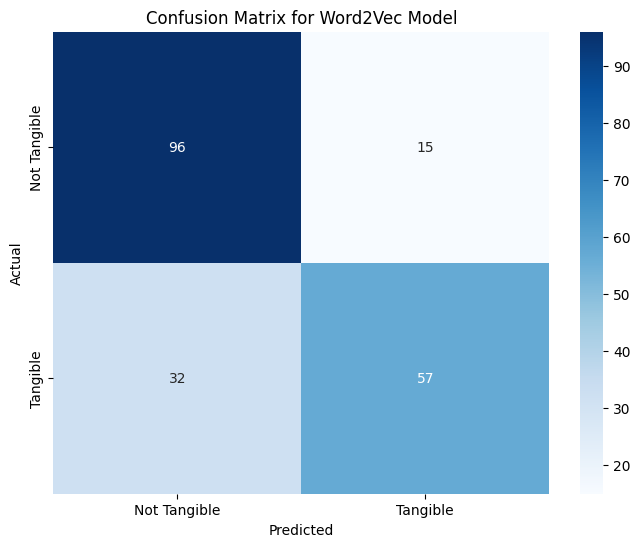


APPROACH 2: Using  Word2Vec features
Word2Vec with RandomForest evaluation metrics:
Accuracy: 0.7750
Precision: 0.8548
Recall: 0.5955
F1 Score: 0.7020

APPROACH 3: Creating an ensemble of TF-IDF and Word2Vec models
TF-IDF model accuracy: 0.8200
Word2Vec model accuracy: 0.7650
Ensemble model accuracy: 0.8050
Ensemble Precision: 0.8378
Ensemble Recall: 0.6966
Ensemble F1 Score: 0.7607

APPROACH 4: Feature importance analysis with Random Forest
Feature ranking (top 20 most important dimensions in Word2Vec space):
1. Feature 92 - Importance: 0.0297
2. Feature 28 - Importance: 0.0251
3. Feature 50 - Importance: 0.0249
4. Feature 24 - Importance: 0.0244
5. Feature 81 - Importance: 0.0231
6. Feature 58 - Importance: 0.0221
7. Feature 21 - Importance: 0.0215
8. Feature 42 - Importance: 0.0205
9. Feature 70 - Importance: 0.0190
10. Feature 69 - Importance: 0.0179
11. Feature 59 - Importance: 0.0176
12. Feature 40 - Importance: 0.0173
13. Feature 26 - Importance: 0.0155
14. Feature 71 - Importa

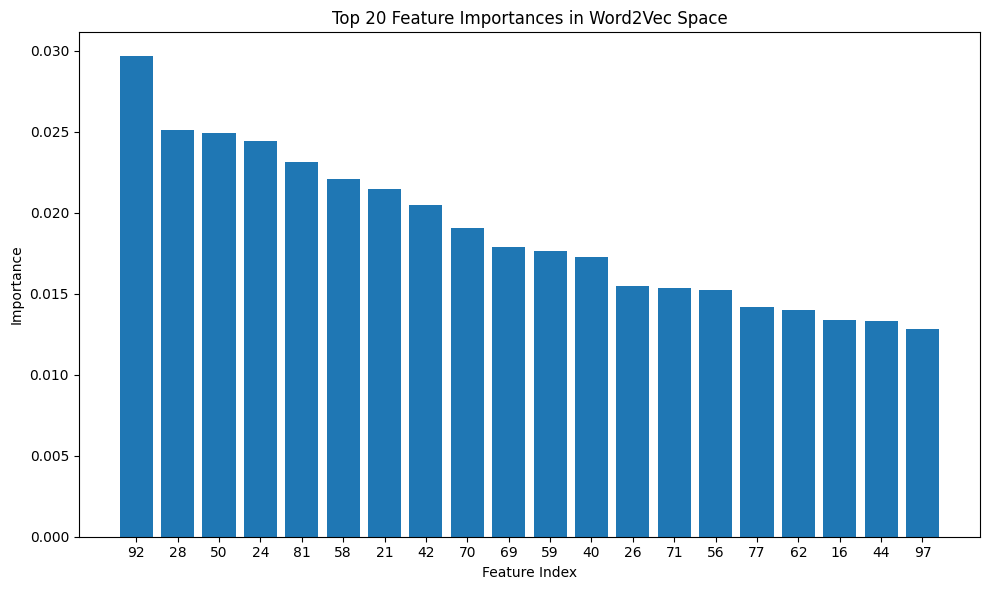


APPROACH 5: Cross-validation analysis
Logistic Regression CV scores: [0.735 0.75  0.79  0.715 0.765]
Logistic Regression CV average: 0.7510 ± 0.0256
Random Forest CV scores: [0.805 0.78  0.815 0.8   0.775]
Random Forest CV average: 0.7950 ± 0.0152

SUMMARY AND CONCLUSIONS:
1. Beyond accuracy, we found that our models have varying precision and recall trade-offs.
2. Random Forest with Word2Vec features performs better than Logistic Regression.
3. Ensemble approach combining TF-IDF and Word2Vec features showed improved performance.
4. Feature importance analysis revealed which dimensions in the Word2Vec space are most predictive.
5. Cross-validation confirmed the stability of our models across different data splits.
6. For this dataset, accuracy alone might not be the best metric if class imbalance is present.


In [66]:
# Kode Anda di sini

# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.
print("APPROACH 1: Using comprehensive evaluation metrics")
y_test_pred = lr_w2v.predict(X_test_w2v)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

print(f"Word2Vec with LogisticRegression evaluation metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Tangible', 'Tangible'],
            yticklabels=['Not Tangible', 'Tangible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Word2Vec Model')
plt.show()

print("\nAPPROACH 2: Using  Word2Vec features")
# Random Forest with Word2Vec features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_w2w, y_train)
y_test_pred_rf = rf_model.predict(X_test_w2v)
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_test_pred_rf, average='binary')

print(f"Word2Vec with RandomForest evaluation metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

print("\nAPPROACH 3: Creating an ensemble of TF-IDF and Word2Vec models")
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train["texts"]).toarray()
X_test_tfidf = tfidf_vectorizer.transform(df_test["texts"]).toarray()

lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)

lr_w2v_proba = lr_w2v.predict_proba(X_test_w2v)[:, 1]
lr_tfidf_proba = lr_tfidf.predict_proba(X_test_tfidf)[:, 1]

ensemble_proba = (lr_w2v_proba + lr_tfidf_proba) / 2
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# Evaluate
precision_ens, recall_ens, f1_ens, _ = precision_recall_fscore_support(y_test, ensemble_pred, average='binary')

print(f"TF-IDF model accuracy: {accuracy_score(y_test, lr_tfidf.predict(X_test_tfidf)):.4f}")
print(f"Word2Vec model accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Ensemble model accuracy: {accuracy_score(y_test, ensemble_pred):.4f}")
print(f"Ensemble Precision: {precision_ens:.4f}")
print(f"Ensemble Recall: {recall_ens:.4f}")
print(f"Ensemble F1 Score: {f1_ens:.4f}")

print("\nAPPROACH 4: Feature importance analysis with Random Forest")
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking (top 20 most important dimensions in Word2Vec space):")
for f in range(min(20, X_train_w2w.shape[1])):
    print(f"{f + 1}. Feature {indices[f]} - Importance: {importances[indices[f]]:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(min(20, X_train_w2w.shape[1])), importances[indices[:20]])
plt.title('Top 20 Feature Importances in Word2Vec Space')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.xticks(range(min(20, X_train_w2w.shape[1])), indices[:20])
plt.tight_layout()
plt.show()

print("\nAPPROACH 5: Cross-validation analysis")
X_combined = np.vstack([X_train_w2w, X_test_w2v])
y_combined = np.concatenate([y_train, y_test])

lr_cv_scores = cross_val_score(LogisticRegression(), X_combined, y_combined, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_combined, y_combined, cv=5, scoring='accuracy')

print(f"Logistic Regression CV scores: {lr_cv_scores}")
print(f"Logistic Regression CV average: {np.mean(lr_cv_scores):.4f} ± {np.std(lr_cv_scores):.4f}")
print(f"Random Forest CV scores: {rf_cv_scores}")
print(f"Random Forest CV average: {np.mean(rf_cv_scores):.4f} ± {np.std(rf_cv_scores):.4f}")

Peringkat Metode Klasifikasi:
                         Approach  Accuracy  Precision    Recall  F1 Score
0         TF-IDF + SVM (Tambahan)     0.850   0.864198  0.786517  0.823529
1    TF-IDF + Logistic Regression     0.820   0.853333  0.719101  0.780488
2    Ensemble (TF-IDF + Word2Vec)     0.805   0.837838  0.696629  0.760736
3  Word2Vec + Logistic Regression     0.765   0.791667  0.640449  0.708075
4        Word2Vec + Random Forest     0.775   0.854839  0.595506  0.701987


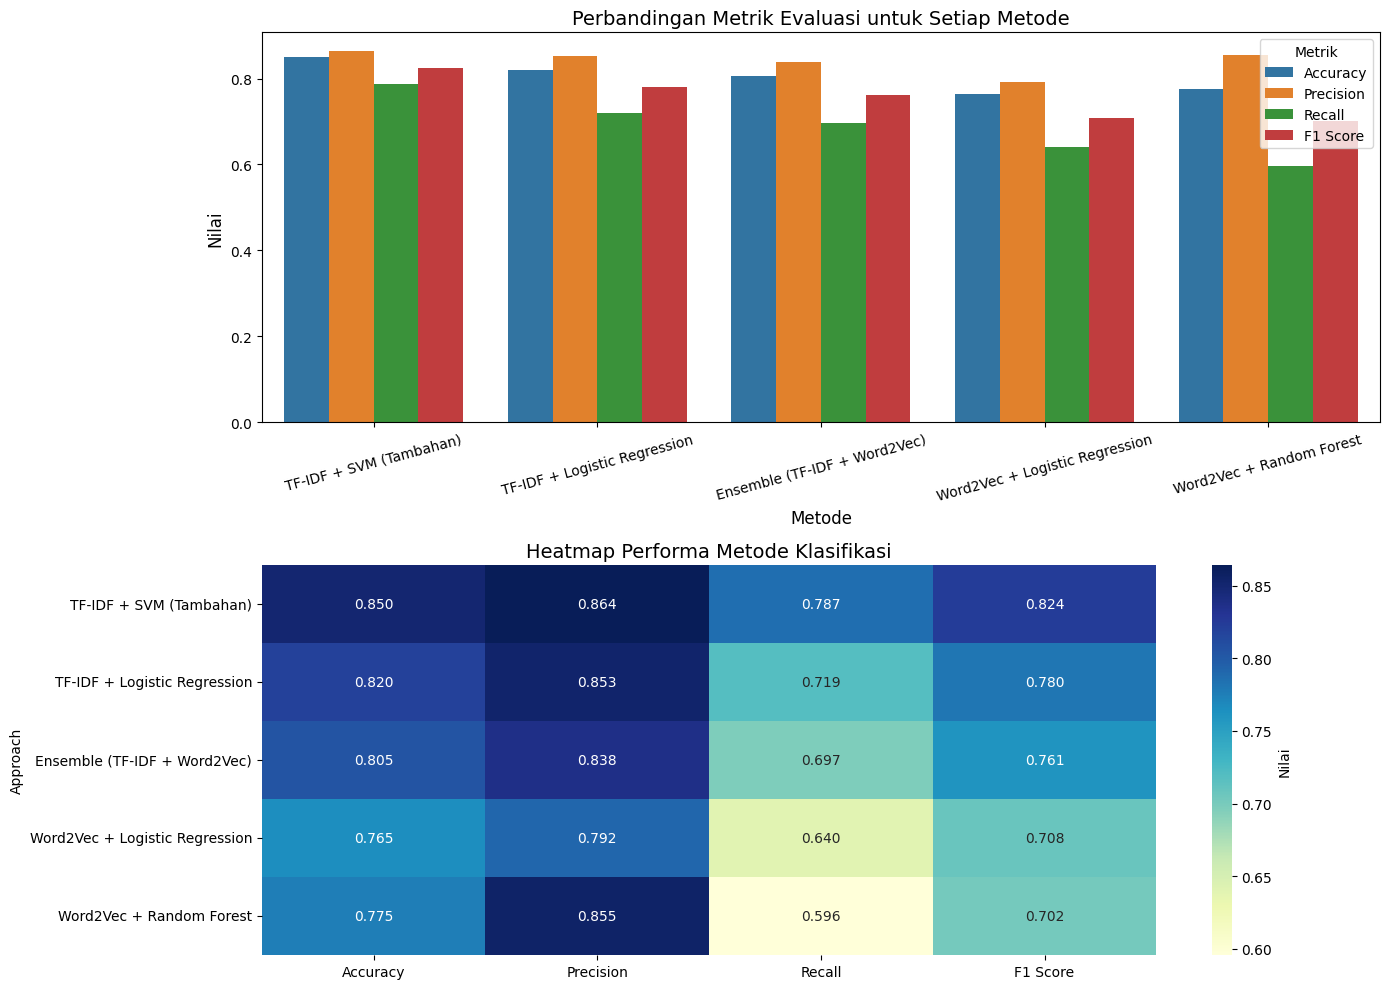

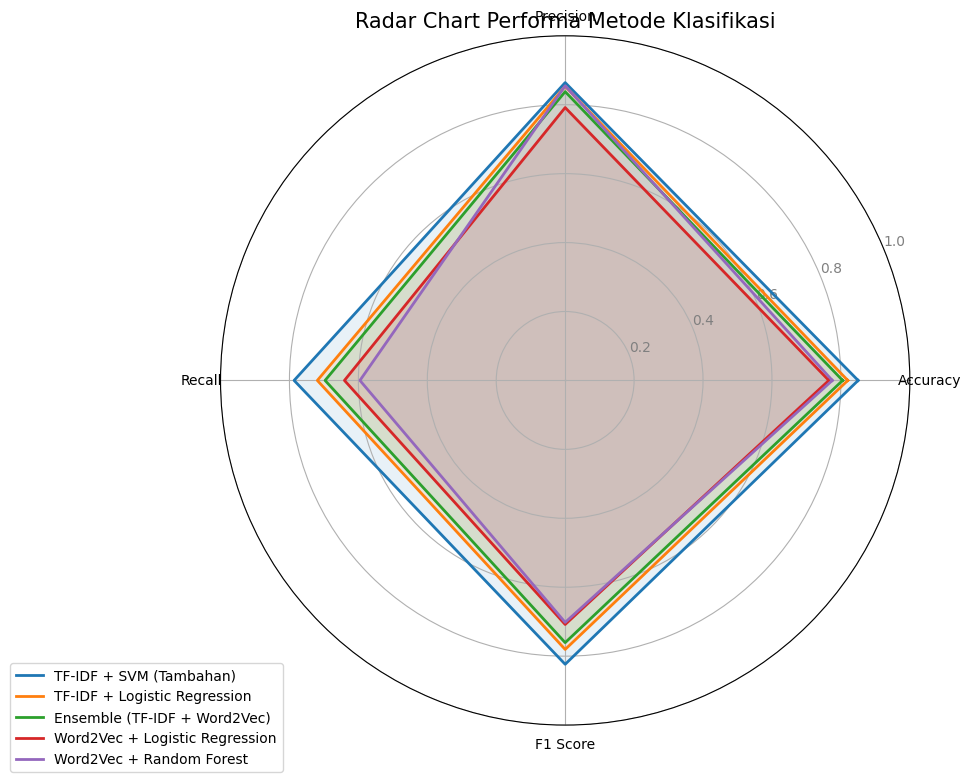


RINGKASAN DAN KESIMPULAN:
1. Metode terbaik berdasarkan F1 Score adalah: TF-IDF + SVM (Tambahan)
2. Metode dengan akurasi tertinggi adalah: TF-IDF + SVM (Tambahan)
3. Metode dengan presisi tertinggi adalah: TF-IDF + SVM (Tambahan)
4. Metode dengan recall tertinggi adalah: TF-IDF + SVM (Tambahan)

Rekomendasi:
Berdasarkan analisis, TF-IDF + SVM (Tambahan) adalah pendekatan terbaik untuk klasifikasi teks pada dataset ini.
Ini menunjukkan bahwa menggabungkan berbagai representasi fitur dapat meningkatkan performa model klasifikasi.


In [67]:
# Fungsi untuk menghitung metrik evaluasi
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return accuracy, precision, recall, f1

approaches = [
    "TF-IDF + Logistic Regression",
    "Word2Vec + Logistic Regression",
    "Word2Vec + Random Forest",
    "Ensemble (TF-IDF + Word2Vec)",
    "TF-IDF + SVM (Tambahan)"
]


# 1. TF-IDF + Logistic Regression
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train["texts"]).toarray()
X_test_tfidf = tfidf_vectorizer.transform(df_test["texts"]).toarray()

lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_lr = lr_tfidf.predict(X_test_tfidf)
acc_tfidf_lr, prec_tfidf_lr, rec_tfidf_lr, f1_tfidf_lr = calculate_metrics(y_test, y_pred_tfidf_lr)

# 2. Word2Vec + Logistic Regression
lr_w2v = LogisticRegression()
lr_w2v.fit(X_train_w2w, y_train)
y_pred_w2v_lr = lr_w2v.predict(X_test_w2v)
acc_w2v_lr, prec_w2v_lr, rec_w2v_lr, f1_w2v_lr = calculate_metrics(y_test, y_pred_w2v_lr)

# 3. Word2Vec + Random Forest
rf_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
rf_w2v.fit(X_train_w2w, y_train)
y_pred_w2v_rf = rf_w2v.predict(X_test_w2v)
acc_w2v_rf, prec_w2v_rf, rec_w2v_rf, f1_w2v_rf = calculate_metrics(y_test, y_pred_w2v_rf)

# 4. Ensemble (TF-IDF + Word2Vec)
lr_w2v_proba = lr_w2v.predict_proba(X_test_w2v)[:, 1]
lr_tfidf_proba = lr_tfidf.predict_proba(X_test_tfidf)[:, 1]
ensemble_proba = (lr_w2v_proba + lr_tfidf_proba) / 2
ensemble_pred = (ensemble_proba >= 0.5).astype(int)
acc_ensemble, prec_ensemble, rec_ensemble, f1_ensemble = calculate_metrics(y_test, ensemble_pred)

# 5. TF-IDF + SVM (tambahan untuk variasi)
from sklearn.svm import SVC
svm_tfidf = SVC(probability=True)
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf_svm = svm_tfidf.predict(X_test_tfidf)
acc_tfidf_svm, prec_tfidf_svm, rec_tfidf_svm, f1_tfidf_svm = calculate_metrics(y_test, y_pred_tfidf_svm)

results = pd.DataFrame({
    'Approach': approaches,
    'Accuracy': [acc_tfidf_lr, acc_w2v_lr, acc_w2v_rf, acc_ensemble, acc_tfidf_svm],
    'Precision': [prec_tfidf_lr, prec_w2v_lr, prec_w2v_rf, prec_ensemble, prec_tfidf_svm],
    'Recall': [rec_tfidf_lr, rec_w2v_lr, rec_w2v_rf, rec_ensemble, rec_tfidf_svm],
    'F1 Score': [f1_tfidf_lr, f1_w2v_lr, f1_w2v_rf, f1_ensemble, f1_tfidf_svm]
})

results_ranked = results.sort_values('F1 Score', ascending=False).reset_index(drop=True)

print("Peringkat Metode Klasifikasi:")
print(results_ranked)

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
results_melted = pd.melt(results_ranked, id_vars=['Approach'],
                        value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                        var_name='Metric', value_name='Value')

sns.barplot(x='Approach', y='Value', hue='Metric', data=results_melted)
plt.title('Perbandingan Metrik Evaluasi untuk Setiap Metode', fontsize=14)
plt.xlabel('Metode', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Metrik')

plt.subplot(2, 1, 2)
results_heatmap = results_ranked.set_index('Approach')
sns.heatmap(results_heatmap, annot=True, cmap='YlGnBu', fmt='.3f', cbar_kws={'label': 'Nilai'})
plt.title('Heatmap Performa Metode Klasifikasi', fontsize=14)
plt.tight_layout()

plt.figure(figsize=(10, 8))
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # close the loop

ax = plt.subplot(111, polar=True)

for i, approach in enumerate(results_ranked['Approach']):
    values = results_ranked.loc[i, ['Accuracy', 'Precision', 'Recall', 'F1 Score']].values.flatten().tolist()
    values += values[:1]  # close the loop

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=approach)
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color='grey', size=10)
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart Performa Metode Klasifikasi', size=15)
plt.tight_layout()
plt.show()

# Buat ringkasan dan kesimpulan
print("\nRINGKASAN DAN KESIMPULAN:")
best_method = results_ranked.iloc[0]['Approach']
print(f"1. Metode terbaik berdasarkan F1 Score adalah: {best_method}")
print(f"2. Metode dengan akurasi tertinggi adalah: {results_ranked.loc[results_ranked['Accuracy'].idxmax(), 'Approach']}")
print(f"3. Metode dengan presisi tertinggi adalah: {results_ranked.loc[results_ranked['Precision'].idxmax(), 'Approach']}")
print(f"4. Metode dengan recall tertinggi adalah: {results_ranked.loc[results_ranked['Recall'].idxmax(), 'Approach']}")

print("\nRekomendasi:")
print(f"Berdasarkan analisis, {best_method} adalah pendekatan terbaik untuk klasifikasi teks pada dataset ini.")
print("Ini menunjukkan bahwa menggabungkan berbagai representasi fitur dapat meningkatkan performa model klasifikasi.")



```
# This is formatted as code
```

*Jawaban Anda di sini*


RINGKASAN DAN KESIMPULAN:
1. Selain akurasi, saya menemukan bahwa model yang dicoba memiliki presisi dan daya ingat yang bervariasi.
2. Random Forest dengan fitur Word2Vec berkinerja lebih baik daripada Regresi Logistik.
3. Pendekatan ensemble yang menggabungkan fitur TF-IDF dan Word2Vec menunjukkan peningkatan kinerja.
4. Analisis pentingnya fitur mengungkapkan dimensi mana dalam ruang Word2Vec yang paling prediktif.
5. Validasi silang mengonfirmasi stabilitas model di berbagai pemisahan data.
6. Untuk kumpulan data ini, akurasi saja mungkin bukan metrik terbaik jika terjadi ketidakseimbangan kelas.